In [2]:
# Spam Email Detection using Machine Learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Step 2: Load Dataset (UCI SMS Spam Collection Dataset)

df = pd.read_csv('spam.csv', sep='\t', header=None, names=["label", "text"])

# Preview the data
df.head()


,label,text
0,"label,message",NaN
1,"ham,""Hey, are we still meeting for lunch today?""",NaN
2,"spam,Congratulations! You've won a $1000 Walma...",NaN
3,"ham,I'll call you later. Just busy at work.",NaN
4,"ham,Don't forget the meeting at 10 AM tomorrow.",NaN


In [3]:
# Step 3: Text Preprocessing Function
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()
    filtered_words = [stemmer.stem(w) for w in words if w not in stop_words]
    return ' '.join(filtered_words)

# Apply cleaning to the dataset
df['cleaned_text'] = df['text'].apply(clean_text)


In [4]:
# Step 4: Convert Labels to Numeric
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [5]:
# Step 5: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['label_num'].values


In [6]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 7: Model Training (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



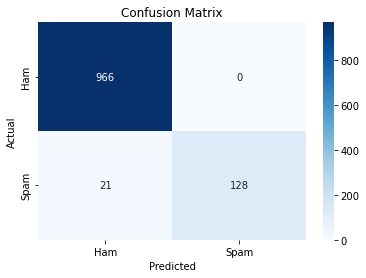

In [8]:
# Step 8: Model Prediction and Evaluation
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Step 9: Custom Spam Prediction Function
def predict_spam(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return "Spam" if prediction == 1 else "Ham"


In [10]:
# Step 10: Test Custom Messages
print(predict_spam("Congratulations! You have won a free ticket. Click here now!"))  # Spam
print(predict_spam("Hey, can you send me the notes from today’s class?"))  # Ham


Spam
Ham
